In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import mglearn

In [2]:
matplotlib.rcParams['font.family']='Malgun Gothic'   # 한글 사용
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
activity = pd.read_csv('train_activity.csv')
label = pd.read_csv('train_label.csv')
# payment = pd.read_csv('train_payment.csv')
# trade = pd.read_csv('train_trade')
# pledge = pd.read_csv('train_pledge')

In [4]:
activity_g = activity.groupby(['char_id','acc_id' ],as_index=False).sum() # groupby 한 다음에 index 분리
activity_g.drop(columns = 'day', inplace = True)
# activity_g

In [6]:
label_new = pd.merge(activity_g, label, how = 'inner', on = 'acc_id')
label_new.drop(columns = 'amount_spent', inplace = True)
# activity_new = label_new.set_index('char_id')
# activity_new
# activity_new.columns

Index(['acc_id', 'playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'boss_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count', 'survival_time'],
      dtype='object')

In [7]:
activity_new2 = label_new.drop(columns = ['char_id','acc_id', 'solo_exp', 'party_exp', 'quest_exp' , 'npc_kill','boss_monster',
                                             'death', 'revive', 'exp_recovery',
                                            'game_money_change', 'enchant_count'])

In [8]:
for i in range(65):
    activity_new2.loc[activity_new2['survival_time'] == i, 'new_sur'] = i * 0.1

In [9]:
activity_new2 = activity_new2.drop(columns = ['survival_time'])

In [10]:
print(activity_new2)

         playtime    fishing  private_shop  new_sur
0        0.123246   0.000000      0.000000      1.7
1        0.502466   0.108789      0.000000      1.7
2        6.676630   2.788803      0.000000      1.7
3        3.659467   2.205042      0.000000      1.7
4        0.026071   0.000000      0.000000      1.7
5        1.180320   0.547419      0.000000      1.7
6        2.732749   0.000000      0.000000      6.4
7        3.635765   0.000000      0.290024      6.4
8       14.258647   0.000000      0.000000      6.4
9        2.680607   0.000000      0.000000      6.4
10       0.011851   0.000000      0.000000      6.4
11      13.950531   5.162439      0.000000      6.4
12       9.852592   0.000000      4.443582      6.4
13       1.483696   0.000000      0.000000      6.4
14       0.007110   0.000000      0.000000      6.4
15       1.012042   0.000000      0.000000      6.4
16       0.011851   0.000000      0.000000      6.4
17      43.394543  17.489477      0.000000      6.4
18       0.1

In [11]:
data_point = activity_new2.values

In [12]:
kmeans = KMeans(n_clusters = 5).fit(data_point)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 3

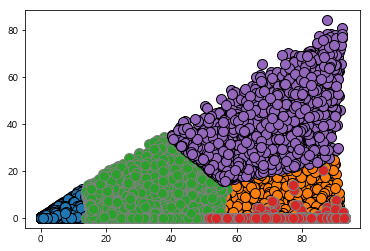

In [13]:
mglearn.discrete_scatter(data_point[:, 0], data_point[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                        markers='^', markeredgewidth =2)